### Heart Disease Diagnose Using SVM & Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

header_list = ['age', 'gender', 'cp', 'trestbps', 'chol', 
               'fbs', 'restecg', 'thalach', 'exang', 
               'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('processed.cleveland.data', header=None, names=header_list)
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### age >>>> age of the patient
#### sex >>>> gender of the patient
#### cp >>>>>type of chest pain (1: "Typical Angina", 2: "Atypical Angina", 3: "Non-Anginal pain", 4: "Asymptomatic")
#### tresttbps >>>> resting blood pressure
#### chol >>>>> serum cholesterol
#### fbs >>>>> fasting blood sugar (fbs>120? ----- 1 : true, 0 : false)
#### restecg >>>> resting ECG results (0:"normal", 1 and 2:"abnormal")
#### thalach >>>> maximu heart rate
#### exang >>>> exercise induced angina (1:yes, 0:no)
#### oldpeak >>>> ST depression induced by exercise relative to rest
#### slope >>>> the slope of the peak exercise St segment (1:"unslopping", 2:"flat", 3:"down slopping")
#### ca >>>> number of major vessels (0-3) colored by fluoroscopy
#### thal >>>> thallasemia (3:"normal", 6:"fixed defect", 7:"reversble defect")
#### num >>>> angianographic disease status (0: "no heart disease", >0:"heart disease)

In [2]:
df.shape

(303, 14)

In [3]:
df.dtypes

age         float64
gender      float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [4]:
df = df[~df[['ca','thal']].apply(lambda x: x.str.contains('\?')).any(axis=1)]
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df[['ca', 'thal']] = df[['ca', 'thal']].astype(float)
df.dtypes

age         float64
gender      float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [6]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [8]:
df.corr()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
gender,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


<AxesSubplot:>

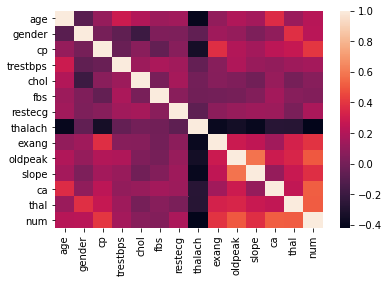

In [9]:
sns.heatmap(df.corr())

#### Cek outliers menggunakan boxplot

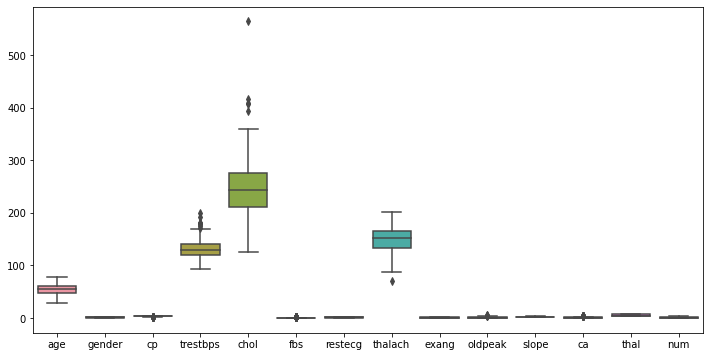

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.show()

#### kolom dengan outliers yang besar >>> trestbps, chol, dan thalach

#### cek distribusi data ketiga kolom tersebut menggunakan histogram plot

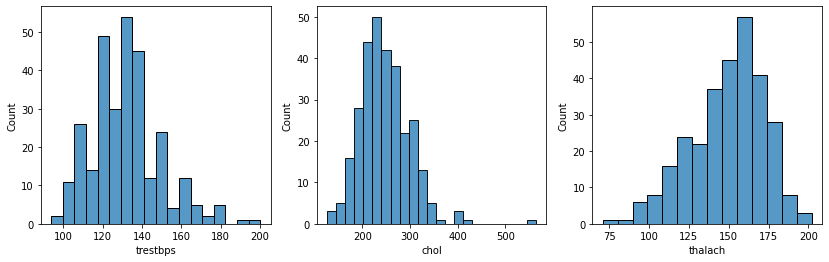

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
sns.histplot(ax=ax[0], data=df, x='trestbps')
sns.histplot(ax=ax[1], data=df, x='chol')
sns.histplot(ax=ax[2], data=df, x='thalach')
plt.show()

#### Mengatasi outliers menggunakan quantile. Dicari quantile atas dan bawah ketiga kolom

#### Quantile kolom "trestbps"

In [12]:
Q1_trest = df['trestbps'].quantile(0.25)
Q3_trest = df['trestbps'].quantile(0.75)
IQR_trest = Q3_trest-Q1_trest

print('Shape awal data :', df.shape)

df = df[~((df['trestbps']<Q1_trest-IQR_trest*1.5) | (df['trestbps']>Q3_trest+IQR_trest*1.5))]
print('Shape awal akhir :', df.shape)

Shape awal data : (297, 14)
Shape awal akhir : (288, 14)


#### Quantile kolom "chol"

In [13]:
Q1_chol = df['chol'].quantile(0.25)
Q3_chol = df['chol'].quantile(0.75)
IQR_chol = Q3_chol-Q1_chol

print('Shape awal data :', df.shape)

df = df[~((df['chol']<Q1_chol-IQR_chol*1.5) | (df['chol']>Q3_chol+IQR_chol*1.5))]
print('Shape awal akhir :', df.shape)

Shape awal data : (288, 14)
Shape awal akhir : (283, 14)


#### Quantile kolom "thalach"

In [14]:
Q1_thalach = df['thalach'].quantile(0.25)
Q3_thalach = df['thalach'].quantile(0.75)
IQR_thalach = Q3_thalach-Q1_thalach

print('Shape awal data :', df.shape)

df = df[~((df['thalach']<Q1_thalach-IQR_thalach*1.5) | (df['thalach']>Q3_thalach+IQR_thalach*1.5))]
print('Shape awal akhir :', df.shape)

Shape awal data : (283, 14)
Shape awal akhir : (282, 14)


#### Melihat distribusi data menggunakan skewness

In [15]:
df.skew().sort_values(ascending=False)

fbs         2.150801
oldpeak     1.275297
ca          1.192657
num         1.090421
exang       0.780096
slope       0.535989
thal        0.283041
trestbps    0.255112
chol        0.164934
restecg     0.035655
age        -0.169207
thalach    -0.465052
cp         -0.817592
gender     -0.851795
dtype: float64

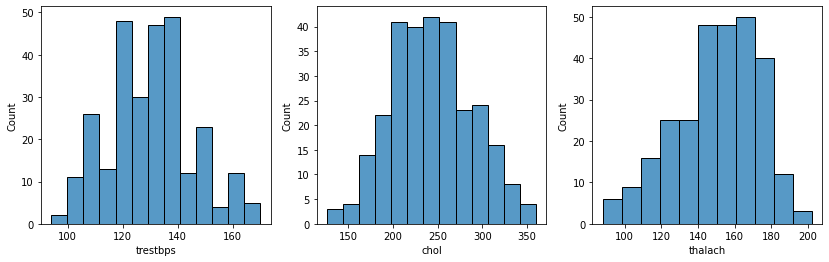

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
sns.histplot(ax=ax[0], data=df, x='trestbps')
sns.histplot(ax=ax[1], data=df, x='chol')
sns.histplot(ax=ax[2], data=df, x='thalach')
plt.show()

#### Ubah status restecg normal/abnormal

In [17]:
df['restecg'] = df['restecg'].apply(lambda x: 0 if x==0 else 1)
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,1,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,1,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,1,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,1,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Ubah status num menjadi heart disease/not
#### 1 => heart disease, 0 => not

In [18]:
df['num'] = df['num'].apply(lambda x:0 if x==0 else 1)
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,1,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,1,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,1,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,1,172.0,0.0,1.4,1.0,0.0,3.0,0


In [19]:
fitur = df.drop('num', axis=1)
target = df['num']

In [20]:
from sklearn.model_selection import train_test_split

fitur_train, fitur_test, target_train, target_test = train_test_split(fitur, target, test_size=0.25, random_state=0)
print('Jumlah fitur training :', fitur_train.shape)
print('Jumlah fitur test :', fitur_test.shape)
print('Jumlah target training :', target_train.shape)
print('Jumlah target test :', target_test.shape)

Jumlah fitur training : (211, 13)
Jumlah fitur test : (71, 13)
Jumlah target training : (211,)
Jumlah target test : (71,)


### Menggunakan SVM

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_class = SVC(kernel='linear')
heart_class = svc_class.fit(fitur_train, target_train)
heart_pred = heart_class.predict(fitur_test)
acc_svm = round(accuracy_score(target_test, heart_pred)*100, 3)
print("Accuracy model using SVM :", acc_svm )

Accuracy model using SVM : 88.732


### Menggunakan Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(max_depth=2)
rf_class.fit(fitur_train, target_train)
rf_pred = rf_class.predict(fitur_test)
acc_rf = round(accuracy_score(target_test, rf_pred)*100, 3)
print("Accuracy model using Random Forest Classifier :", acc_rf)

Accuracy model using Random Forest Classifier : 87.324


### Menggunakan Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb_class = GaussianNB()
gnb_class.fit(fitur_train, target_train)
gnb_pred = gnb_class.predict(fitur_test)
acc_gnb = round(accuracy_score(target_test, gnb_pred)*100, 3)
print("Accuracy model using Naive Bayes :", acc_gnb)

Accuracy model using Naive Bayes : 88.732


### Menggunakan MLP

In [24]:
from sklearn.neural_network import MLPClassifier

mlp_class = MLPClassifier()
mlp_class.fit(fitur_train, target_train)
mlp_pred = mlp_class.predict(fitur_test)
acc_mlp = round(accuracy_score(target_test, mlp_pred)*100, 3)
print("Accuracy model using MLP :", acc_mlp)

Accuracy model using MLP : 80.282


### Menggunakan Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

dec_class = DecisionTreeClassifier()
dec_class.fit(fitur_train, target_train)
dec_pred = dec_class.predict(fitur_test)
acc_dec = round(accuracy_score(target_test, dec_pred)*100, 3)
print("Accuracy model using Decision Tree :", acc_dec)

Accuracy model using Decision Tree : 77.465


### Menggunakan Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

logreg_class = LogisticRegression()
logreg_class.fit(fitur_train, target_train)
logreg_pred = logreg_class.predict(fitur_test)
acc_logreg = round(accuracy_score(target_test,logreg_pred)*100, 3)
print("Accuracy model using Logistic Regression :", acc_logreg)

Accuracy model using Logistic Regression : 85.915


/home/rohmi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Menggunakan KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier(n_neighbors=3)
knn_class.fit(fitur_train, target_train)
knn_pred = knn_class.predict(fitur_test)
acc_knn = round(accuracy_score(target_test, knn_pred)*100, 2)
print("Accuracy model using Logistic Regression :", acc_knn)

Accuracy model using Logistic Regression : 61.97


### Hasil Akurasi 

In [28]:
hasil_akurasi = pd.DataFrame({'Algoritma':['SVM', 'Random Forest', 'Naive Bayes', 
                                           'MLP', 'Decision Tree', 'Logistic Regression', 
                                           'KNN'], 
                             'Score':[acc_svm, acc_rf, acc_gnb, acc_mlp, acc_dec, acc_logreg, acc_knn]})
hasil_akurasi.sort_values(by='Score', ascending=False)

,Algoritma,Score
0,SVM,88.732
2,Naive Bayes,88.732
1,Random Forest,87.324
5,Logistic Regression,85.915
3,MLP,80.282
4,Decision Tree,77.465
6,KNN,61.970
